In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('charts.csv')

In [3]:
df.head()

df.shape


(330087, 7)

In [4]:
print(f"The dataframe is {(df.shape[0])} rows and {(df.shape[1])} columns.")

The dataframe is 330087 rows and 7 columns.


Shape gives us an overview of the DataFrame's dimensions.

In [5]:
df.isnull().sum()

date                  0
rank                  0
song                  0
artist                0
last-week         32312
peak-rank             0
weeks-on-board        0
dtype: int64

The only missing values are in the last-week column, which has 32312 missing values. Displaying full records below. 

In [6]:
# Missing value rows printed
missing_values = df[df['last-week'].isnull()]
missing_values.head()


,date,rank,song,artist,last-week,peak-rank,weeks-on-board
26,2021-11-06,27,Moth To A Flame,Swedish House Mafia & The Weeknd,NaN,27,1
27,2021-11-06,28,Let's Go Brandon,Bryson Gray Featuring Tyson James & Chandler C...,NaN,28,1
60,2021-11-06,61,Not In The Mood,"Lil Tjay, Fivio Foreign & Kay Flock",NaN,61,1
68,2021-11-06,69,Switches & Dracs,Moneybagg Yo Featuring Lil Durk & EST Gee,NaN,69,1
78,2021-11-06,79,Poke It Out,Wale Featuring J. Cole,NaN,79,1


In [7]:
df = df.sort_values('date', ascending=False)


The latest date of the dataset is 2021-11-06. 

# How many unique number one songs have there been in 2021?

In [8]:
# Calculating unique number one songs in 2021
unique_songs = df[
    (df['date'] >= '2021-01-01')
    & 
    (df['peak-rank'] == 1)
]['song'].nunique()

print(f"There are {unique_songs} unique number one songs in 2021.")

There are 26 unique number one songs in 2021.


In [9]:
# Imputing missing values in 'last-week' column with 0
df['last-week'] = df['last-week'].fillna(0)

Fill missing values in 'last_week' with 0 for this analysis because a missing value indicates that the song was not on the chart the previous week. Furthermore, this can mean that the song is new to the chart or has re-entered the chart after being absent. Both scenarios imply that the song was not ranked in the top 100 in the previous week, which is effectively represented by a value of 0 in the 'last_week' column.

In [10]:
# The missing values may indicate that these songs were not on the chart previous week, not necessarily their first week on the chart. We can create an indicator variable for first week on chart. It is important to note that this does not mean first week released, only first week on chart, plus there is a possibility that they were on the chart on a week before this data was collected.
# Creating indicator column 'chart_status' that indicates whether the song is in its first week on the chart, continuing from last week, or a re-entry (not on chart last week but has been on chart before).
df['chart_status'] = df.apply(
    lambda row: 'continuing' if pd.notnull(row['last-week']) else 'first-week' if row['peak-rank'] == row['rank'] else 're-entry', axis= 1
)

The code above creates a new column 'chart_status' in the dataframe 'df'. This column categorizes each song's status on the chart for that week into three categories: 'continuing', 'first-week', or 're-entry'. This is importan since we deleted the last-week column earlier, so we need a way to identify first-week entries.

In [11]:
df['chart_status'].value_counts()

chart_status
continuing    330087
Name: count, dtype: int64

In [12]:
df.head()

# Dates are in descending order, sort them in ascending order for time series analysis

df = df.sort_values('date', ascending=True)


In [13]:
# We are now good to go with no missing values
df.isnull().sum()

date              0
rank              0
song              0
artist            0
last-week         0
peak-rank         0
weeks-on-board    0
chart_status      0
dtype: int64

In [14]:
# Exploratory data analysis and modeling can proceed
df.describe()

,rank,last-week,peak-rank,weeks-on-board
count,330087.000000,330087.000000,330087.000000,330087.000000
mean,50.500929,42.932918,40.970629,9.161785
std,28.866094,30.166474,29.347481,7.618264
min,1.000000,0.000000,1.000000,1.000000
25%,26.000000,16.000000,13.000000,4.000000
50%,51.000000,41.000000,38.000000,7.000000
75%,76.000000,69.000000,65.000000,13.000000
max,100.000000,100.000000,100.000000,90.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330087 entries, 330086 to 0
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            330087 non-null  object 
 1   rank            330087 non-null  int64  
 2   song            330087 non-null  object 
 3   artist          330087 non-null  object 
 4   last-week       330087 non-null  float64
 5   peak-rank       330087 non-null  int64  
 6   weeks-on-board  330087 non-null  int64  
 7   chart_status    330087 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 22.7+ MB


In [16]:
# Specific Artist Analysis: Billie Eilish
billie_eilish_songs = df[df['artist'] == 'Billie Eilish']

In [17]:
billie_eilish_songs

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,chart_status
17092,2018-08-04,93,You Should See Me In A Crown,Billie Eilish,0.0,93,1,continuing
15764,2018-11-03,65,When The Party's Over,Billie Eilish,0.0,65,1,continuing
15657,2018-11-10,58,When The Party's Over,Billie Eilish,65.0,58,2,continuing
15566,2018-11-17,67,When The Party's Over,Billie Eilish,58.0,58,3,continuing
15458,2018-11-24,59,When The Party's Over,Billie Eilish,67.0,58,4,continuing
...,...,...,...,...,...,...,...,...
430,2021-10-09,31,Happier Than Ever,Billie Eilish,28.0,11,9,continuing
328,2021-10-16,29,Happier Than Ever,Billie Eilish,31.0,11,10,continuing
229,2021-10-23,30,Happier Than Ever,Billie Eilish,29.0,11,11,continuing
129,2021-10-30,30,Happier Than Ever,Billie Eilish,30.0,11,12,continuing


In [18]:
be_top_100 = billie_eilish_songs[billie_eilish_songs['rank'] <=100]

In [19]:

be_top_100['song'].nunique()

28

Billie Eilish has had 28 entries in the top 100 from 2020-11-07 to 2021-11-06.

In [20]:
be_top_100['song'].value_counts()

song
Bad Guy                          49
Everything I Wanted              33
When The Party's Over            32
Therefore I Am                   27
Ocean Eyes                       20
Bury A Friend                    20
Happier Than Ever                13
Wish You Were Gay                11
You Should See Me In A Crown      8
All The Good Girls Go To Hell     7
My Future                         7
Your Power                        6
NDA                               5
Xanny                             4
My Strange Addiction              4
Lost Cause                        4
idontwannabeyouanymore            3
No Time To Die                    3
I Didn't Change My Number         1
Getting Older                     1
Billie Bossa Nova                 1
Oxytocin                          1
I Love You                        1
Halley's Comet                    1
Come Out And Play                 1
Listen Before I Go                1
Ilomilo                           1
8                      

Billie's longest charting hits (in order from biggest to smallest) are 'Bad Guy', 'Everything I Wanted', and 'When the Party's Over', each with at least 30 weeks on the chart.

In [21]:
peak_ranks = be_top_100.groupby('song')['peak-rank'].min().sort_values(ascending=True).reset_index()


In [22]:
peak_ranks

,song,peak-rank
0,Bad Guy,1
1,Therefore I Am,2
2,My Future,6
3,Everything I Wanted,8
4,Your Power,10
5,Happier Than Ever,11
6,Bury A Friend,14
7,No Time To Die,16
8,Lost Cause,27
9,When The Party's Over,29


Billie's highest charting hit is 'Bad Guy', which peaked at number 1. 'Therefore I Am' peaked at number 2 and 'My Future' peaked at number 6.

In [23]:
be_top_100

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,chart_status
17092,2018-08-04,93,You Should See Me In A Crown,Billie Eilish,0.0,93,1,continuing
15764,2018-11-03,65,When The Party's Over,Billie Eilish,0.0,65,1,continuing
15657,2018-11-10,58,When The Party's Over,Billie Eilish,65.0,58,2,continuing
15566,2018-11-17,67,When The Party's Over,Billie Eilish,58.0,58,3,continuing
15458,2018-11-24,59,When The Party's Over,Billie Eilish,67.0,58,4,continuing
...,...,...,...,...,...,...,...,...
430,2021-10-09,31,Happier Than Ever,Billie Eilish,28.0,11,9,continuing
328,2021-10-16,29,Happier Than Ever,Billie Eilish,31.0,11,10,continuing
229,2021-10-23,30,Happier Than Ever,Billie Eilish,29.0,11,11,continuing
129,2021-10-30,30,Happier Than Ever,Billie Eilish,30.0,11,12,continuing


In [24]:
be_top_100['weeks-on-board'].sum()

3449

Billie Eilish songs had a combined total of 3449 weeks on the Billboard Hot 100 chart from 2020-11-07 to 2021-11-06! This means that if you added up all the weeks each of her songs spent on the chart during this period, it would total 3449 weeks.

In [25]:
# Counting each week as one, even if multiple songs are on the chart in the same week
total_weeks_on_chart = be_top_100['weeks-on-board'].sum()
total_weeks_on_chart

3449

In [ ]:
# We can analyze the unique songs by Billie Eilish that made it to the top 10
be_top_100['song'].unique()

array(['You Should See Me In A Crown', "When The Party's Over",
       'Ocean Eyes', 'Come Out And Play', 'idontwannabeyouanymore',
       'Bury A Friend', 'Wish You Were Gay', '8', 'Listen Before I Go',
       'Ilomilo', 'I Love You', 'All The Good Girls Go To Hell',
       'My Strange Addiction', 'Xanny', 'Bad Guy', 'Everything I Wanted',
       'No Time To Die', 'My Future', 'Therefore I Am', 'Your Power',
       'Lost Cause', 'NDA', "Halley's Comet", "I Didn't Change My Number",
       'Oxytocin', 'Billie Bossa Nova', 'Getting Older',
       'Happier Than Ever'], dtype=object)

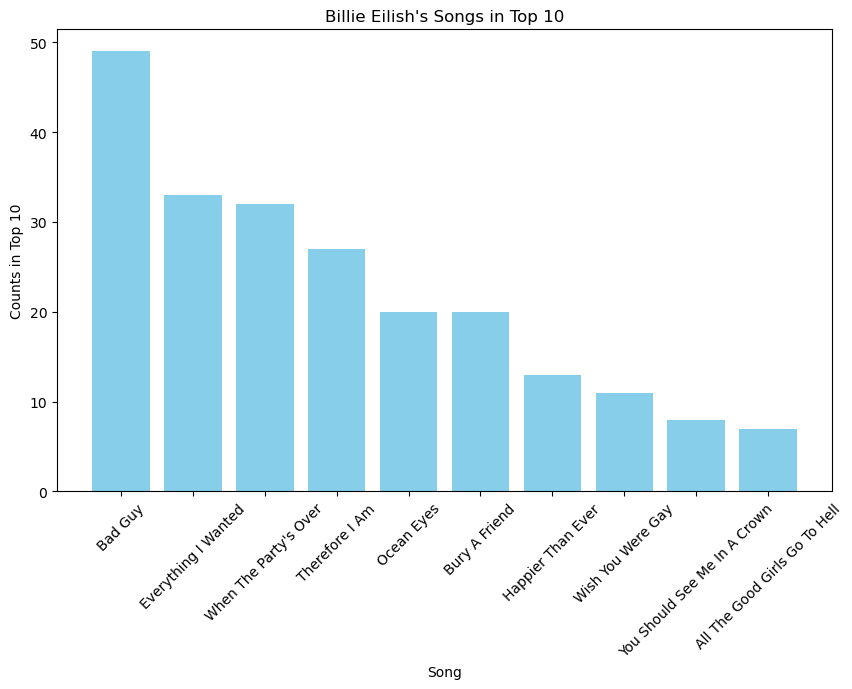

In [27]:
# We can analyze the counts that Billie Eilish's songs appeared in the top 10
# Barplot of counts of Billie Eilish's songs in the top 10
x = be_top_100['song']
y = be_top_100['song'].value_counts().head(10)  

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(
    y.index, 
    y.values, 
    color='skyblue'
    )
plt.title("Billie Eilish's Songs in Top 10")
plt.xlabel('Song')
plt.ylabel('Counts in Top 10')
plt.xticks(rotation=45)
plt.show()


In [30]:
unique_artists = df.drop_duplicates(subset=['artist'])
print(type(unique_artists))

<class 'pandas.core.frame.DataFrame'>
